# EDA part 2

## I. Imports & functions

In [120]:
import pandas as pd
import pycountry_convert as pc
import pycountry
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from fancyimpute import knn
from sklearn.impute import KNNImputer

pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

## II. Imputation

In [3]:
# # resampling the data and filling missing values; getting rid of duplicates at the same time
# new_data = data.resample('60min').mean() 
# new_data = new_data.fillna(method = 'pad') # using only past data

In [4]:
# https://conferences.oreilly.com/strata/strata-ny-2019/cdn.oreillystatic.com/en/assets/1/event/300/Handling%20data%20gaps%20in%20time%20series%20using%20imputation%20Presentation.pdf
# https://www.kaggle.com/oguzkaanmavice/time-series-deal-with-missing-values
# https://impyute.readthedocs.io/en/master/api/time_series_imputation.html
# https://www.aptech.com/blog/introduction-to-the-fundamentals-of-panel-data/
# https://drive.google.com/file/d/1-NqVpF3__iKll7qvAu3Ebcx76DE-d2yH/view

<AxesSubplot:title={'center':'export'}>

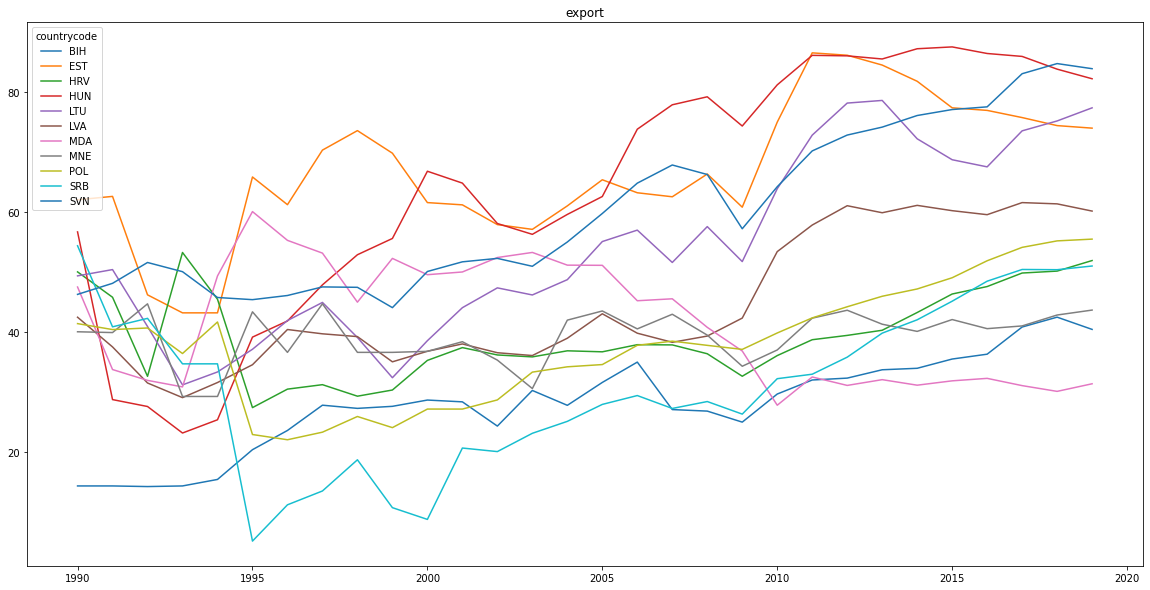

In [140]:
data = pd.read_csv('data/final_data.csv')
data = data[data.year != 2020] # 16 out of 26 indexes missing

data['co2_emission'].fillna(method = 'pad', inplace = True) # Only 2019

data['employment_agro'].fillna(method = 'backfill', inplace = True) # Only 1990
data['employment_industry'].fillna(method = 'backfill', inplace = True) # Only 1990
data['employment_services'].fillna(method = 'backfill', inplace = True) # Only 1990
data['unemployment'].fillna(method = 'backfill', inplace = True) # Only 1990

# data.drop('countrycode', axis=1).isna().groupby(data.countrycode, sort=False).sum().reset_index()
# data.drop('year', axis=1).isna().groupby(data.year, sort=False).sum().reset_index()

# pd.Series(KNNImputer(n_neighbors=2).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 17]).eq(data.export)
data.export = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 17])

data_test = data[(data.countrycode.isin(['BIH', 'EST', 'HRV', 'HUN', 'SVN', 'SRB', 'POL', 'MNE', 'MDA', 'LVA', 'LTU']))]
df_test_transposed = data_test.pivot_table(index='countrycode', columns=['year'], values='export').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')

df_test_final.T.plot(figsize=(20,10), title='export')
